In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

### 테스트용 데이터 생성

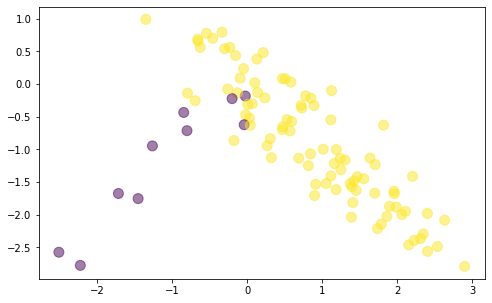

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                           n_classes=2, n_clusters_per_class=1, weights=[0.1, 0.9], random_state=591)

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=0.5)
plt.show()

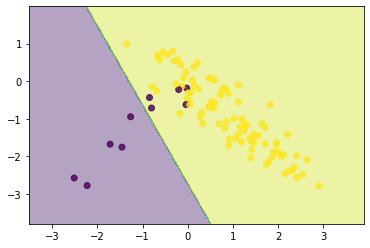

In [3]:
clf = LogisticRegression()
clf.fit(X, y)


plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

### 그래프 함수

In [4]:
def plot_samples(X, y, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
    if title is not None:
        ax.set_title(title)
    sns.despine(ax=ax, offset=10)

In [5]:
def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    
    if title is not None:
        ax.set_title(title)

## Over-sampling

`Random Over-sampling` : 소수 클래스의 원 데이터를 중복 생성

`SMOTE` : Interpolation을 통해 새로운 데이터를 생성 (아래 이미지 참고)

`ADASYN` : `SMOTE`와 같이 interpolation을 통해 생성하나, 원 데이터 중 k-NN으로 잘못 분류되는 데이터들을 중점으로 생성

<br>

![SMOTE](https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_generation_sample_001.png)

> 출처 : https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_illustration_generation_sample.html

In [6]:
from imblearn.over_sampling import *

### Random Oversampling VS. SMOTE VS. ADASYN

In [7]:
X_samples = {'Raw': X}
y_samples = {'Raw': y}

samplers = {'Random': RandomOverSampler(), 
            'SMOTE': SMOTE(),
            'ADASYN': ADASYN()}

for name, sampler in samplers.items():
    X_samples[name], y_samples[name] = sampler.fit_resample(X, y)

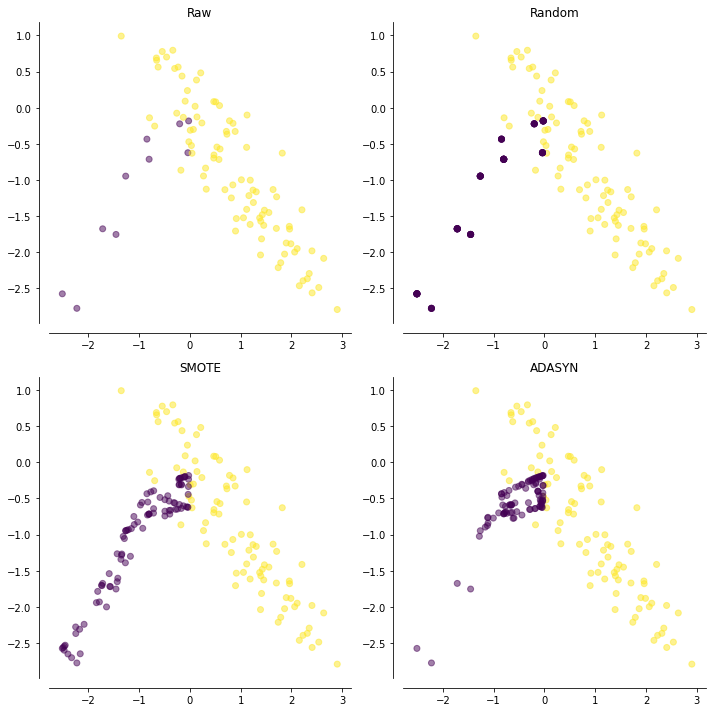

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for ax, key in zip(axes.ravel(), X_samples.keys()):
    plot_samples(X_samples[key], y_samples[key], ax, title=key)
fig.tight_layout()

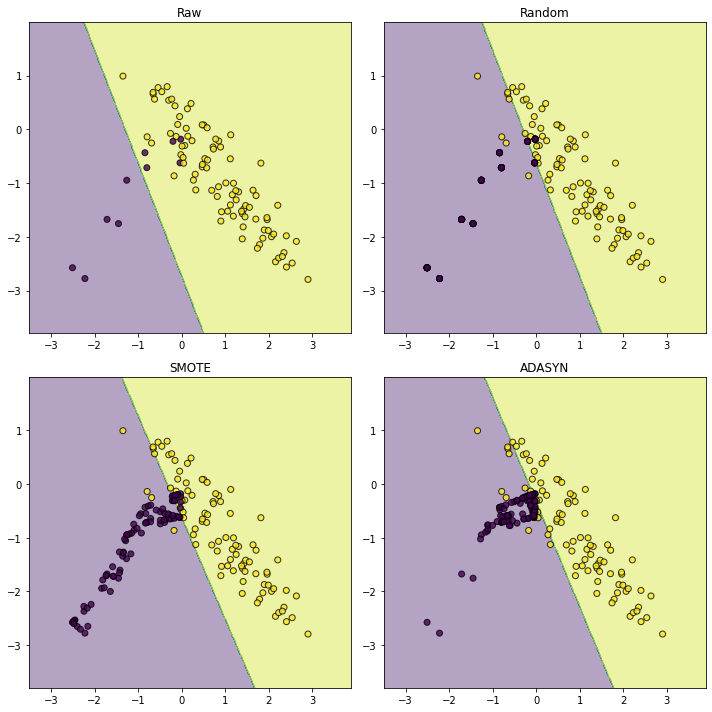

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

clf = LogisticRegression()

for ax, key in zip(axes.ravel(), X_samples.keys()):
    clf.fit(X_samples[key], y_samples[key])
    plot_decision_function(X_samples[key], y_samples[key], clf, ax, title=key)
fig.tight_layout()

### Random Over-sampling

- `shrinkage` : Parameter controlling the shrinkage applied to the covariance matrix.

> smoothed bootstrap 생성을 위해 사용

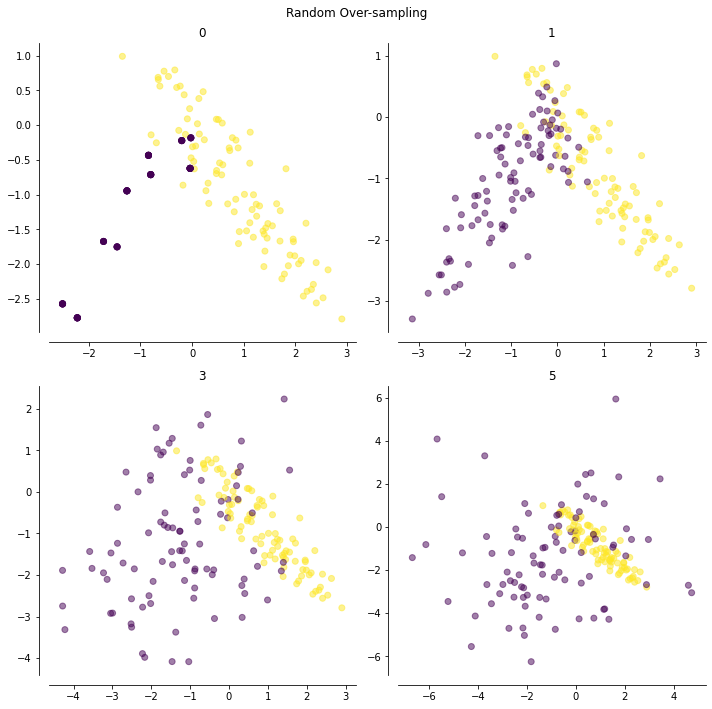

In [10]:
shrinkages = [0, 1, 3, 5]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for ax, shrinkage in zip(axes.ravel(), shrinkages):
    sampler = RandomOverSampler(shrinkage=shrinkage)
    X_sample, y_sample = sampler.fit_resample(X, y)
    plot_samples(X_sample, y_sample, ax, title=shrinkage)

fig.suptitle('Random Over-sampling')
fig.tight_layout()

### SMOTE

`BorderlineSMOTE` : Borderline 버전 (두 클래스의 경계에 위치한 데이터들을 오버 샘플링) 

`SVMSMOTE` : SVM 버전 (Borderline을 파악할 때 support vector 사용)

`KMeansSMOTE` : KMeans 버전 (데이터를 생성하기 전에 군집을 생성한 후, 소수 데이터가 많은 군집의 데이터만 오버 샘플링)

> [Borderline-SMOTE](https://sci2s.ugr.es/keel/keel-dataset/pdfs/2005-Han-LNCS.pdf)
> 
> [Oversampling for Imbalanced Learning
Based on K-Means and SMOTE](https://arxiv.org/pdf/1711.00837.pdf)

In [11]:
X_samples = {'Raw': X}
y_samples = {'Raw': y}

samplers = {'SMOTE': SMOTE(),
            'ADASYN': ADASYN(),
            'Borderline SMOTE': BorderlineSMOTE(),
            'SVM SMOTE': SVMSMOTE(),
            'K-Means SMOTE': KMeansSMOTE()}

for name, sampler in samplers.items():
    X_samples[name], y_samples[name] = sampler.fit_resample(X, y)

C:\Users\gekri\Anaconda3\envs\AI_dev_env\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  f"MiniBatchKMeans is known to have a memory leak on "


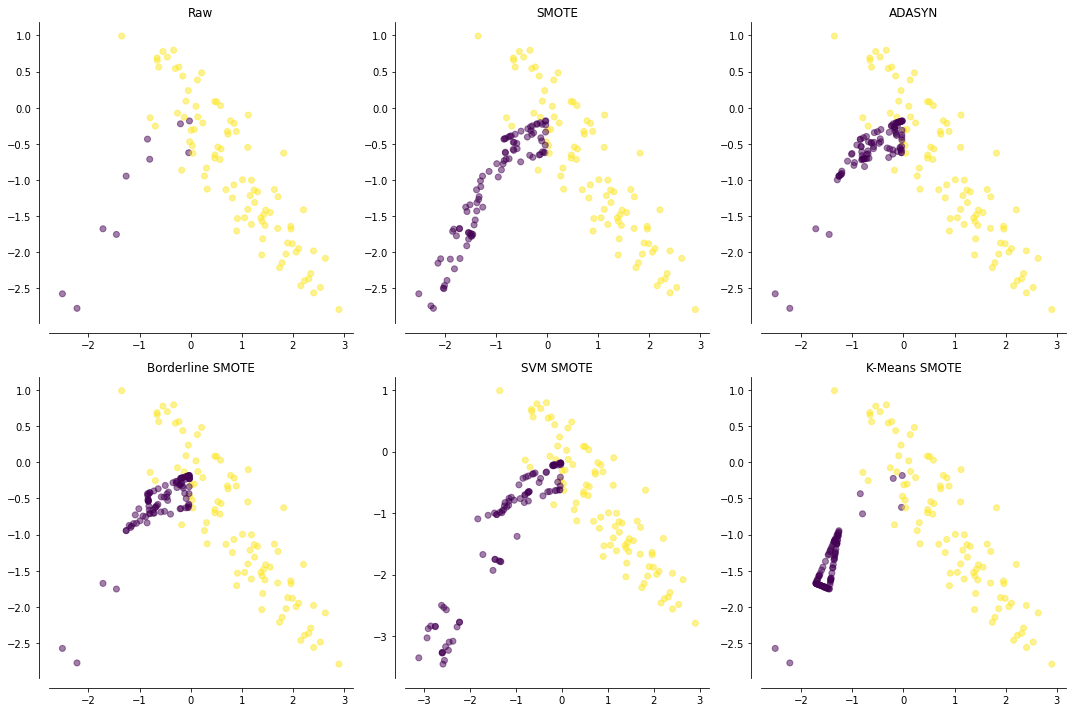

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for ax, key in zip(axes.ravel(), X_samples.keys()):
    plot_samples(X_samples[key], y_samples[key], ax, title=key)
fig.tight_layout()